In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat

In [3]:
bank = pd.read_csv('bank.csv')

In [74]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,PROF_LEVELS,Age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Retired,Middle_Aged
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Retired,Middle_Aged
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Senior,Middle_Aged
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Retired,Middle_Aged
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Retired,Middle_Aged


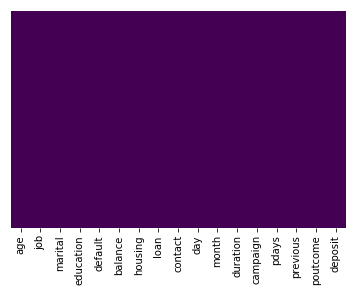

In [5]:
sns.heatmap(bank.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [ ]:
#numerical variables: age; balance; day; duration; campaign; pdays; previous; 
# Categorical: marital; education; default; housing; loan; contact; poutcome; deposit

In [ ]:
#Top 5 days that people take leaves
18    87
20    81
8     78
21    78
17    68

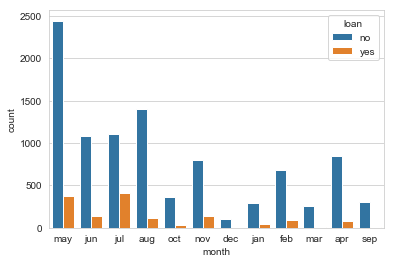

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='month',hue = 'loan',data=bank)

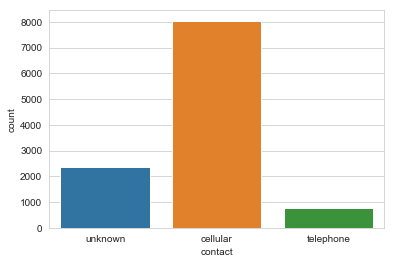

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='contact',data=bank)

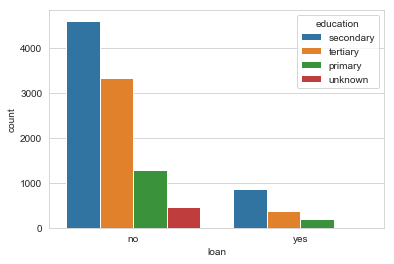

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='loan',hue = 'education',data=bank)

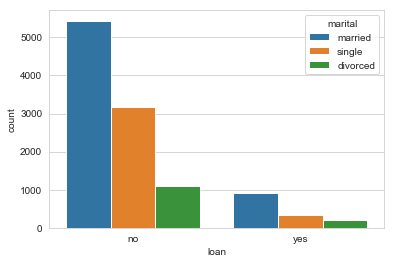

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='loan',hue = 'marital',data=bank)

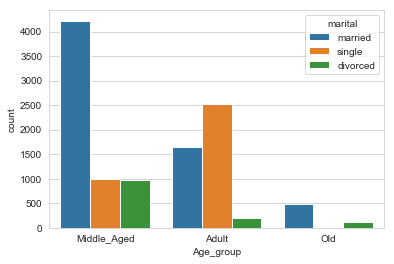

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Age_group',hue = 'marital',data=bank)

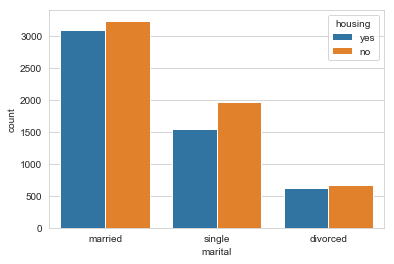

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='marital',hue = 'housing',data=bank)

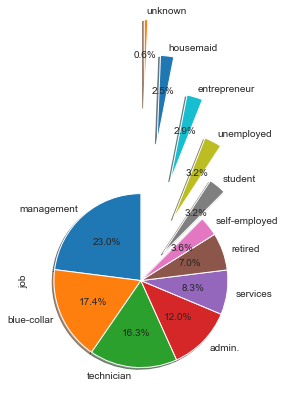

In [33]:
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.8, 1.2, 1.6, 2.0)
bank['job'].value_counts().plot.pie(autopct='%1.1f%%',explode = explode, shadow=True, startangle=90)
mat.gca().set_aspect('equal')

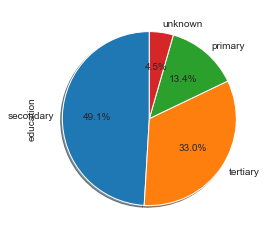

In [57]:
bank['education'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

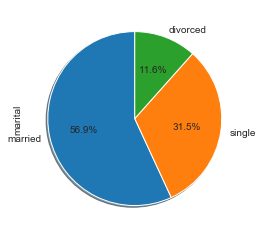

In [56]:
bank['marital'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [65]:
def get_age(age):
    if (age < 30):
        return 'Entry Level'
    elif (age > 29 and age < 40):
        return 'Intermediate'
    elif (age > 39 and age < 50):
        return 'Senior'
    else:
        return 'Retired'
    

In [66]:
bank['PROF_LEVELS'] = bank['age'].apply(get_age)

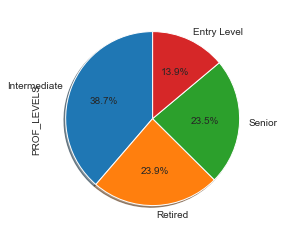

In [67]:
bank['PROF_LEVELS'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

In [71]:
def get_level(age):
    if (age <= 35):
        return 'Adult'
    elif (age >35 and age < 61):
        return 'Middle_Aged'
    else:
        return 'Old'

In [72]:
bank['Age_group'] = bank['age'].apply(get_level)

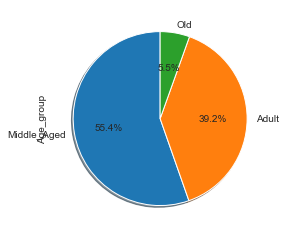

In [73]:
bank['Age_group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

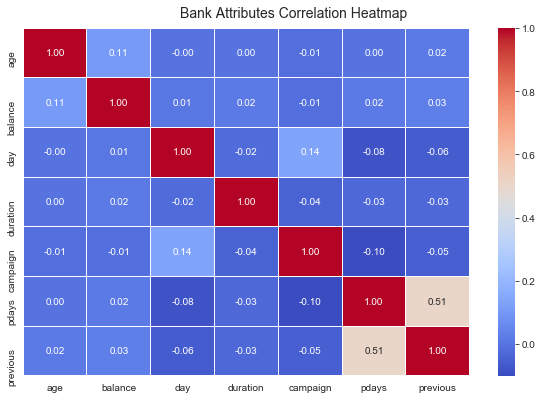

In [77]:
f, ax = mat.subplots(figsize=(10, 6))
corr = bank.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bank Attributes Correlation Heatmap', fontsize=14)

In [88]:
gt = bank.loc[bank['loan']=='yes']